In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)

/home/dosa/MON_ENV_PYTHON/ARTICLE_IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [4]:
var_phy1 = ['1', '2', '3', '4', '5', '6', '7'] # new vers
var_phy2 = ['2', '3', '4', '5', '6', '7', '8']

correl_1 = './LAST_OUTPUT_JAN2019/CORREL_ALL_FORCINGS_PCA_2011.nc' 
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy1:
    for phyvar2 in var_phy2:
        if phyvar2>phyvar:
            vars()['correl_'+phyvar+phyvar2] = f.variables['correl_'+phyvar+phyvar2][0,:,:]# extracting data

f.close()

np.shape(correl_68) # (160, 394) seems ok!

# STOP REMOVING NON SIGNIF CORRELATIONS
### We don't use that anymore ###
 
# Removing non significant values
#for phyvar in var_phy:
#    for biovar in var_bio:
#        vars()[biovar+'_'+phyvar][(vars()[biovar+'_'+phyvar]>-0.33)&(vars()[biovar+'_'+phyvar]<0.33)] = np.nan
        
print 'END of CELL'

file exist: True
END of CELL


In [6]:
# test #
test = bathy
test[test<=200] = 0
test[test>200] = np.nan
test[lon_t<-5.5] = np.nan
test[(lat_t>40) & (lon_t>26.9)] = np.nan

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in less


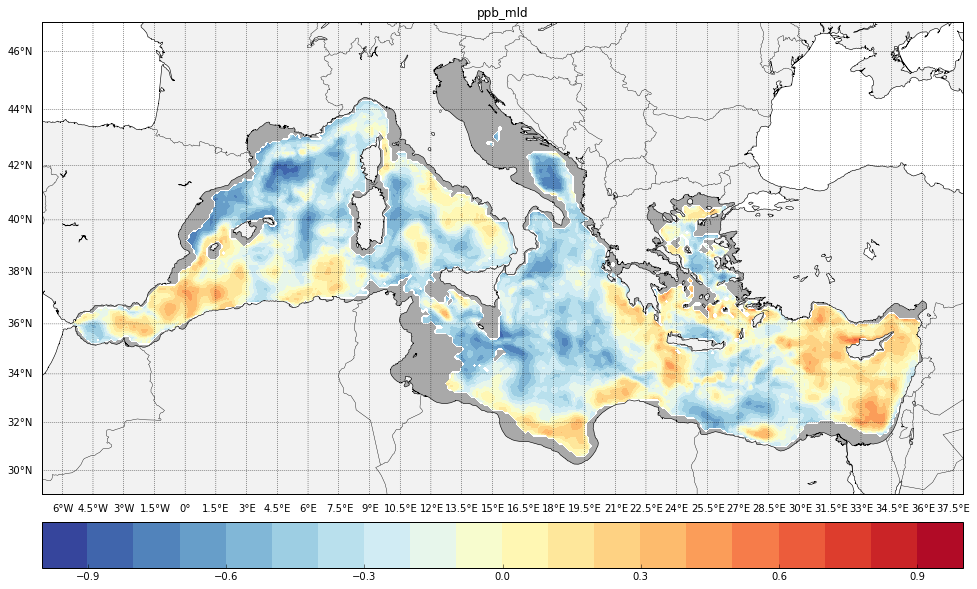

In [29]:
# Removing non significant values
#for phyvar in var_phy:
#    for biovar in var_bio:
#        vars()[biovar+'_'+phyvar][(vars()[biovar+'_'+phyvar]>-0.33)&(vars()[biovar+'_'+phyvar]<0.33)] = np.nan

#np.shape(test)

var_bio = ['ppb'] 
var_phy = ['mld'] # 'snsf','strf',

for phyvar in var_phy:
    for biovar in var_bio:
        x1,x2,y1,y2 = -7, 38, 29, 47;
        m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    # figure
        fig = plt.figure(figsize=(16,16));
        ax = fig.add_axes([0.1,0.1,0.8,0.8]);
        m.drawcountries(linewidth=0.4);
        m.drawcoastlines(linewidth=0.6);
        m.fillcontinents(color='0.95',lake_color='white');
        parallels = np.arange(0.,81,2);
        m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
        meridians = np.arange(-6.,351.,1.5);
        m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

        # Creating corresponding variable names
        data_to_plot = np.ma.masked_where(bathy<200,vars()[biovar+'_'+phyvar])
        data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

        # doing a map # Données
        xd,yd = m(lon_t,lat_t);
        levels = np.arange(-1,1.1,0.1);
        levels2 = [-0.33,0.33];
        #levels2 = np.arange(-1,1.1,0.2);
        levels_bathy = [200] ;
        m.contourf(xd,yd,test,cmap=plt.cm.Greys);
        #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
        cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
        #CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=1,colors='grey'); #
        plt.colorbar(cs, orientation='horizontal', pad = 0.03)
        #plt.colorbar(CS_bathy, orientation='horizontal', pad = 0.03)
        plt.title(biovar+'_'+phyvar)

print 'END of CELL'

In [10]:
np.shape(bathy)

(160, 394)

/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in less


END of CELL


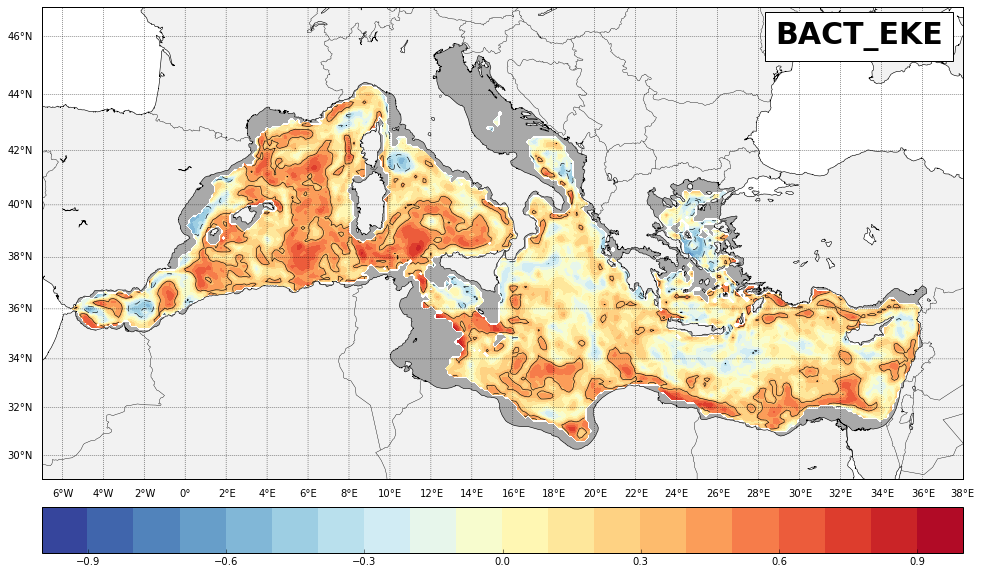

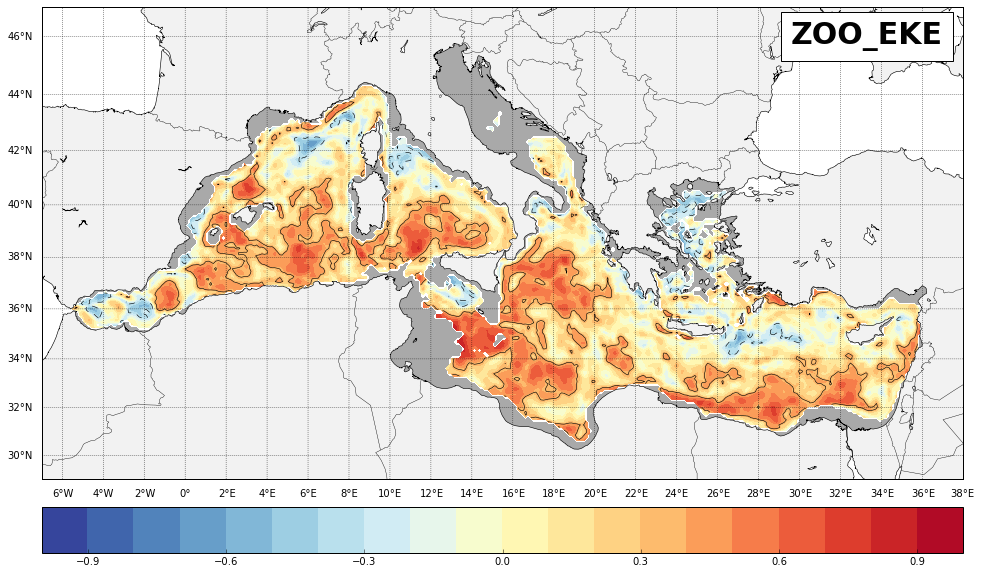

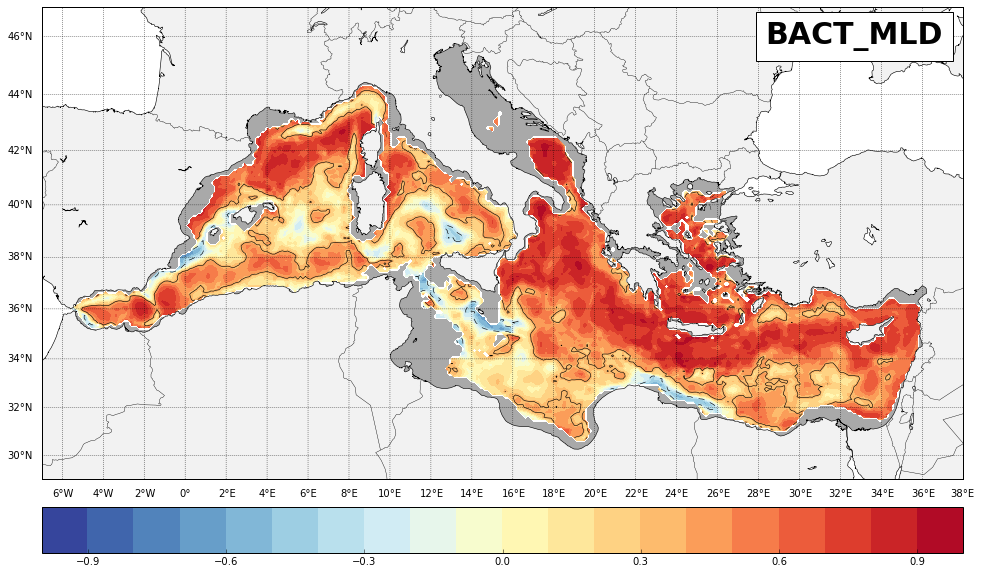

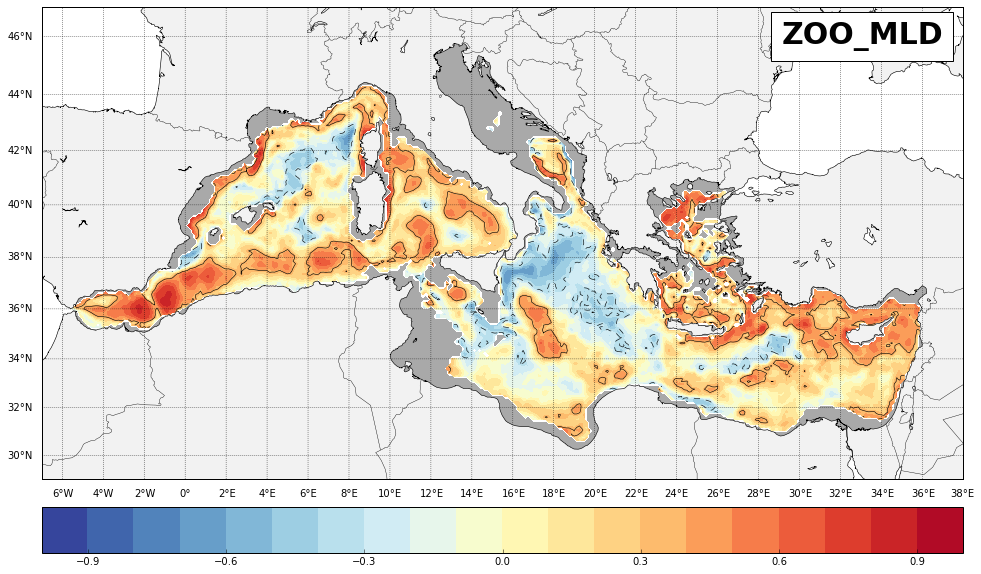

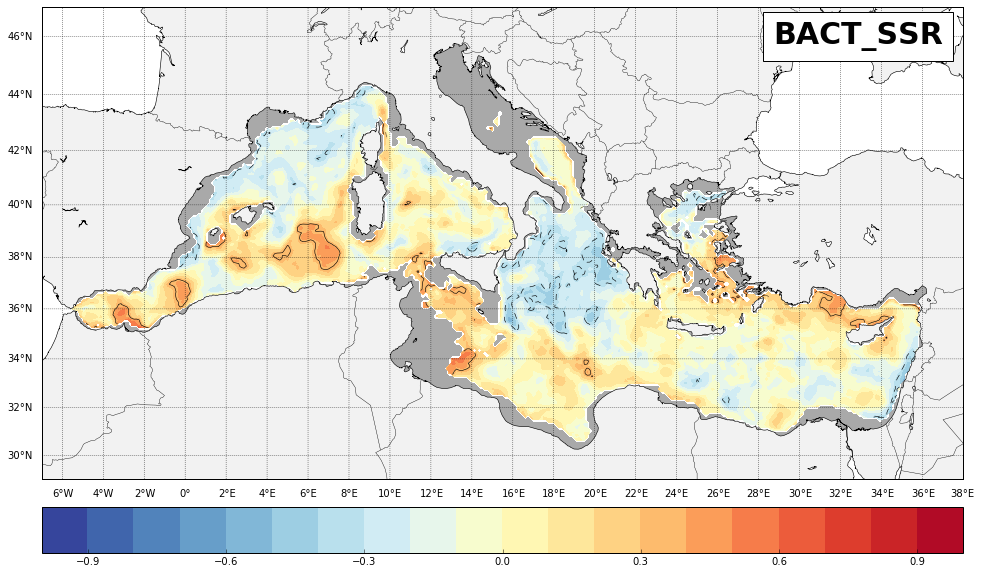

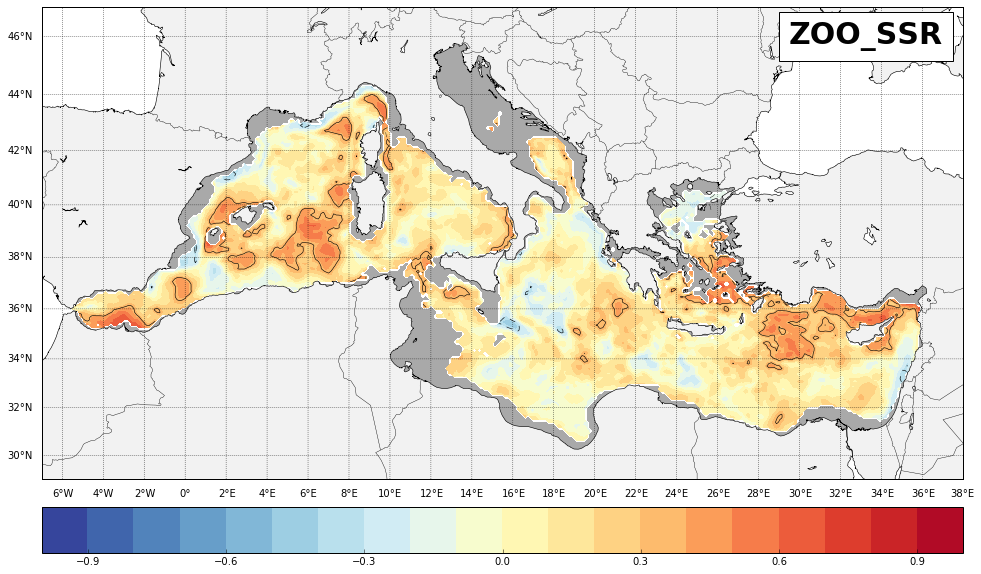

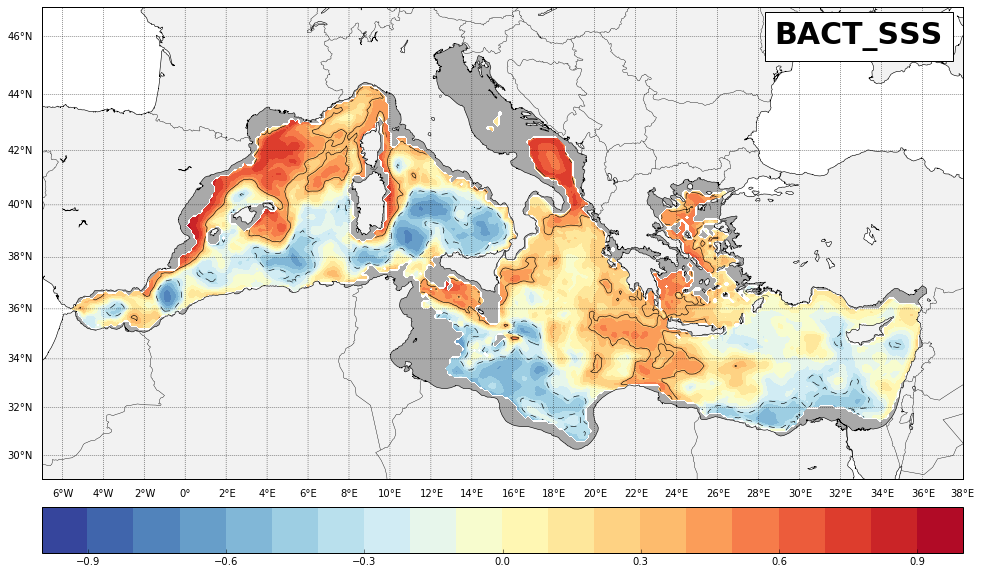

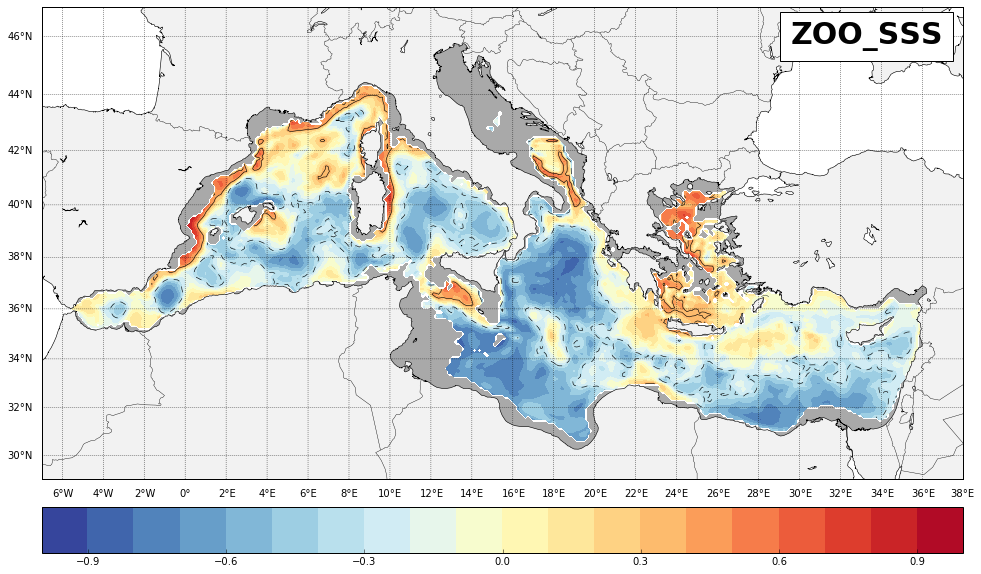

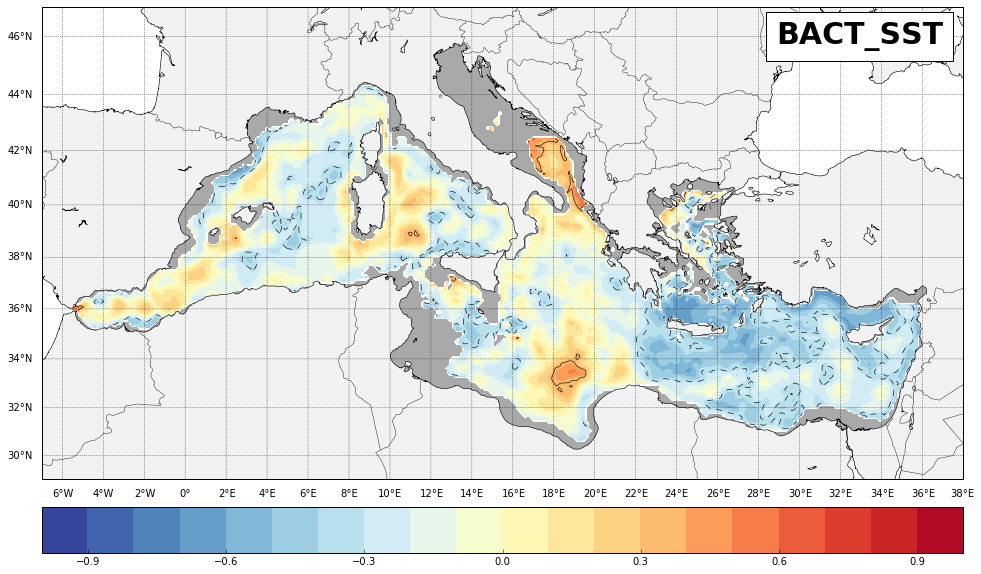

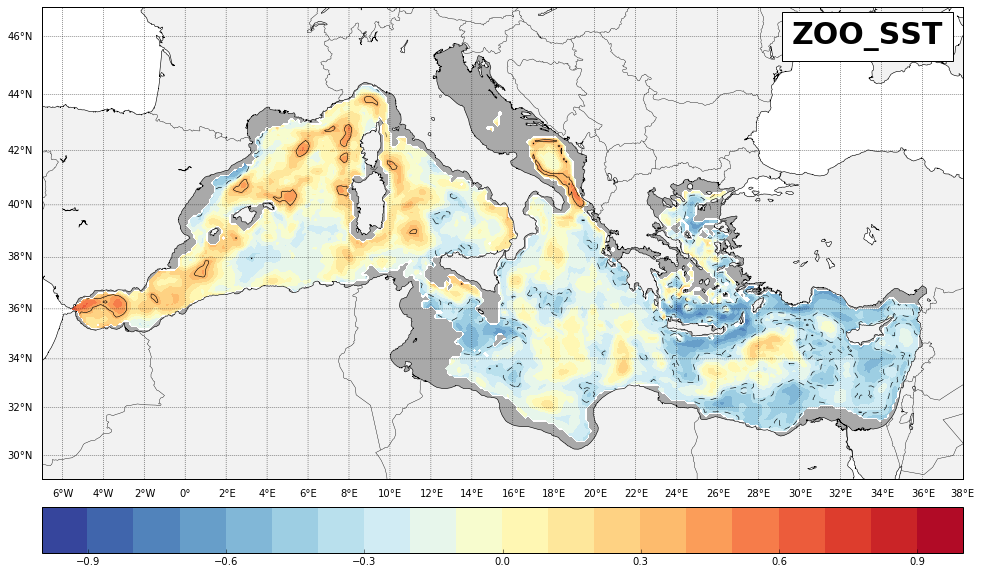

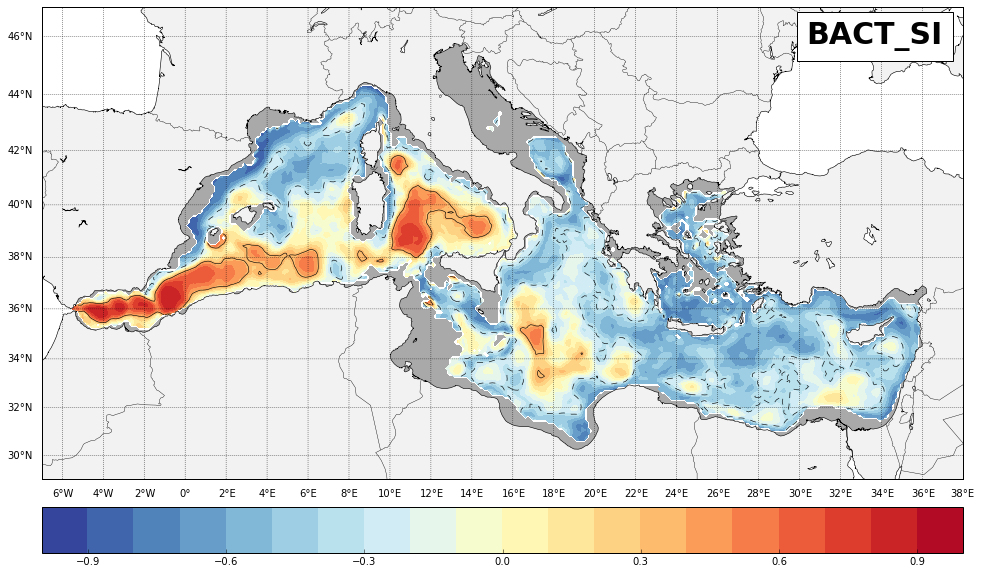

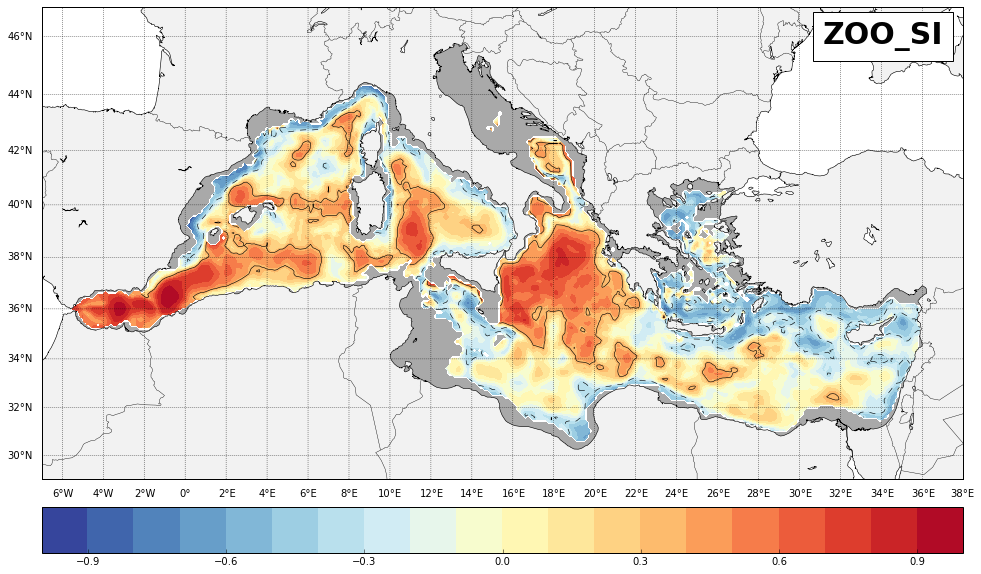

In [9]:
# TEST #
test = bathy
test[test<=200] = 0
test[test>200] = np.nan # np.nan TEST ALEX
test[lon_t<-5.5] = np.nan
test[(lat_t>40) & (lon_t>26.9)] = np.nan

#var_bio_test = ['ppb'] 
#var_phy_test = ['mld', 'eke', 'sss', 'str2'] # 'snsf','strf',
var_bio_test = ['ppb','netppb','ncp','resp','export_poc200','export_doc200','export_nit_sw','export_nit_iw','chlsurf'] # new vers
var_phy_test = ['eke', 'mld', 'ssr', 'sss', 'sst', 'str2']

for phyvar in var_phy_test:
    for biovar in var_bio: #_test: var_bio_test
        x1,x2,y1,y2 = -7, 38, 29, 47;
        m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    # figure
        fig = plt.figure(figsize=(16,16));
        ax = fig.add_axes([0.1,0.1,0.8,0.8]);
        m.drawcountries(linewidth=0.4);
        m.drawcoastlines(linewidth=0.6);
        m.fillcontinents(color='0.95',lake_color='white');
        parallels = np.arange(0.,81,2);
        m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
        meridians = np.arange(-6.,351.,2); # 1.5
        m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

        # Creating corresponding variable names
        data_to_plot = np.ma.masked_where(bathy<200,vars()[biovar+'_'+phyvar])
        data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

        # doing a map # Données
        xd,yd = m(lon_t,lat_t);
        levels = np.arange(-1,1.1,0.1);
        #levels2 = [-0.33,0.33];
        levels2 = [-0.3440,0.3440]; # More precise critical value for df=31 (N=33)
        #levels2 = np.arange(-1,1.1,0.2);
        levels_bathy = [200] ;
        m.contourf(xd,yd,test,cmap=plt.cm.Greys);
        CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
        cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
        CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
        plt.colorbar(cs, orientation='horizontal', pad = 0.03)
        #plt.title(biovar+'_'+phyvar)
        #x_text,y_text = m(29,45)
        x_text,y_text = m(37,46.5)
        if phyvar == 'str2':
            phyvar_t = 'si'
        else:
            phyvar_t = phyvar
            
        if biovar == 'bactc':
            #this_txt = str('gpp_'+phyvar)
            biovar_t = 'bact'
        else:
            biovar_t = biovar
        #else:
        this_txt = str(biovar_t+'_'+phyvar_t)
        upp_txt = this_txt.upper()
        
        plt.text(x_text,y_text, upp_txt,fontsize=30, fontweight='bold', bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5, 

        #plt.text(x_text,y_text,upp_txt,fontsize=30, fontweight='bold', bbox={'facecolor':'white', 'pad':10}) # 'facecolor':'red', 'alpha':0.5, 
        #plt.savefig('/home/dosa/THESE/CR_reunions/NOV_FIGS/NEW_CORR_MAPS2/'+biovar_t+'_'+phyvar_t+'.png',bbox_inches='tight',format='png')

print 'END of CELL'

In [9]:
int(phyvar)

7

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in less


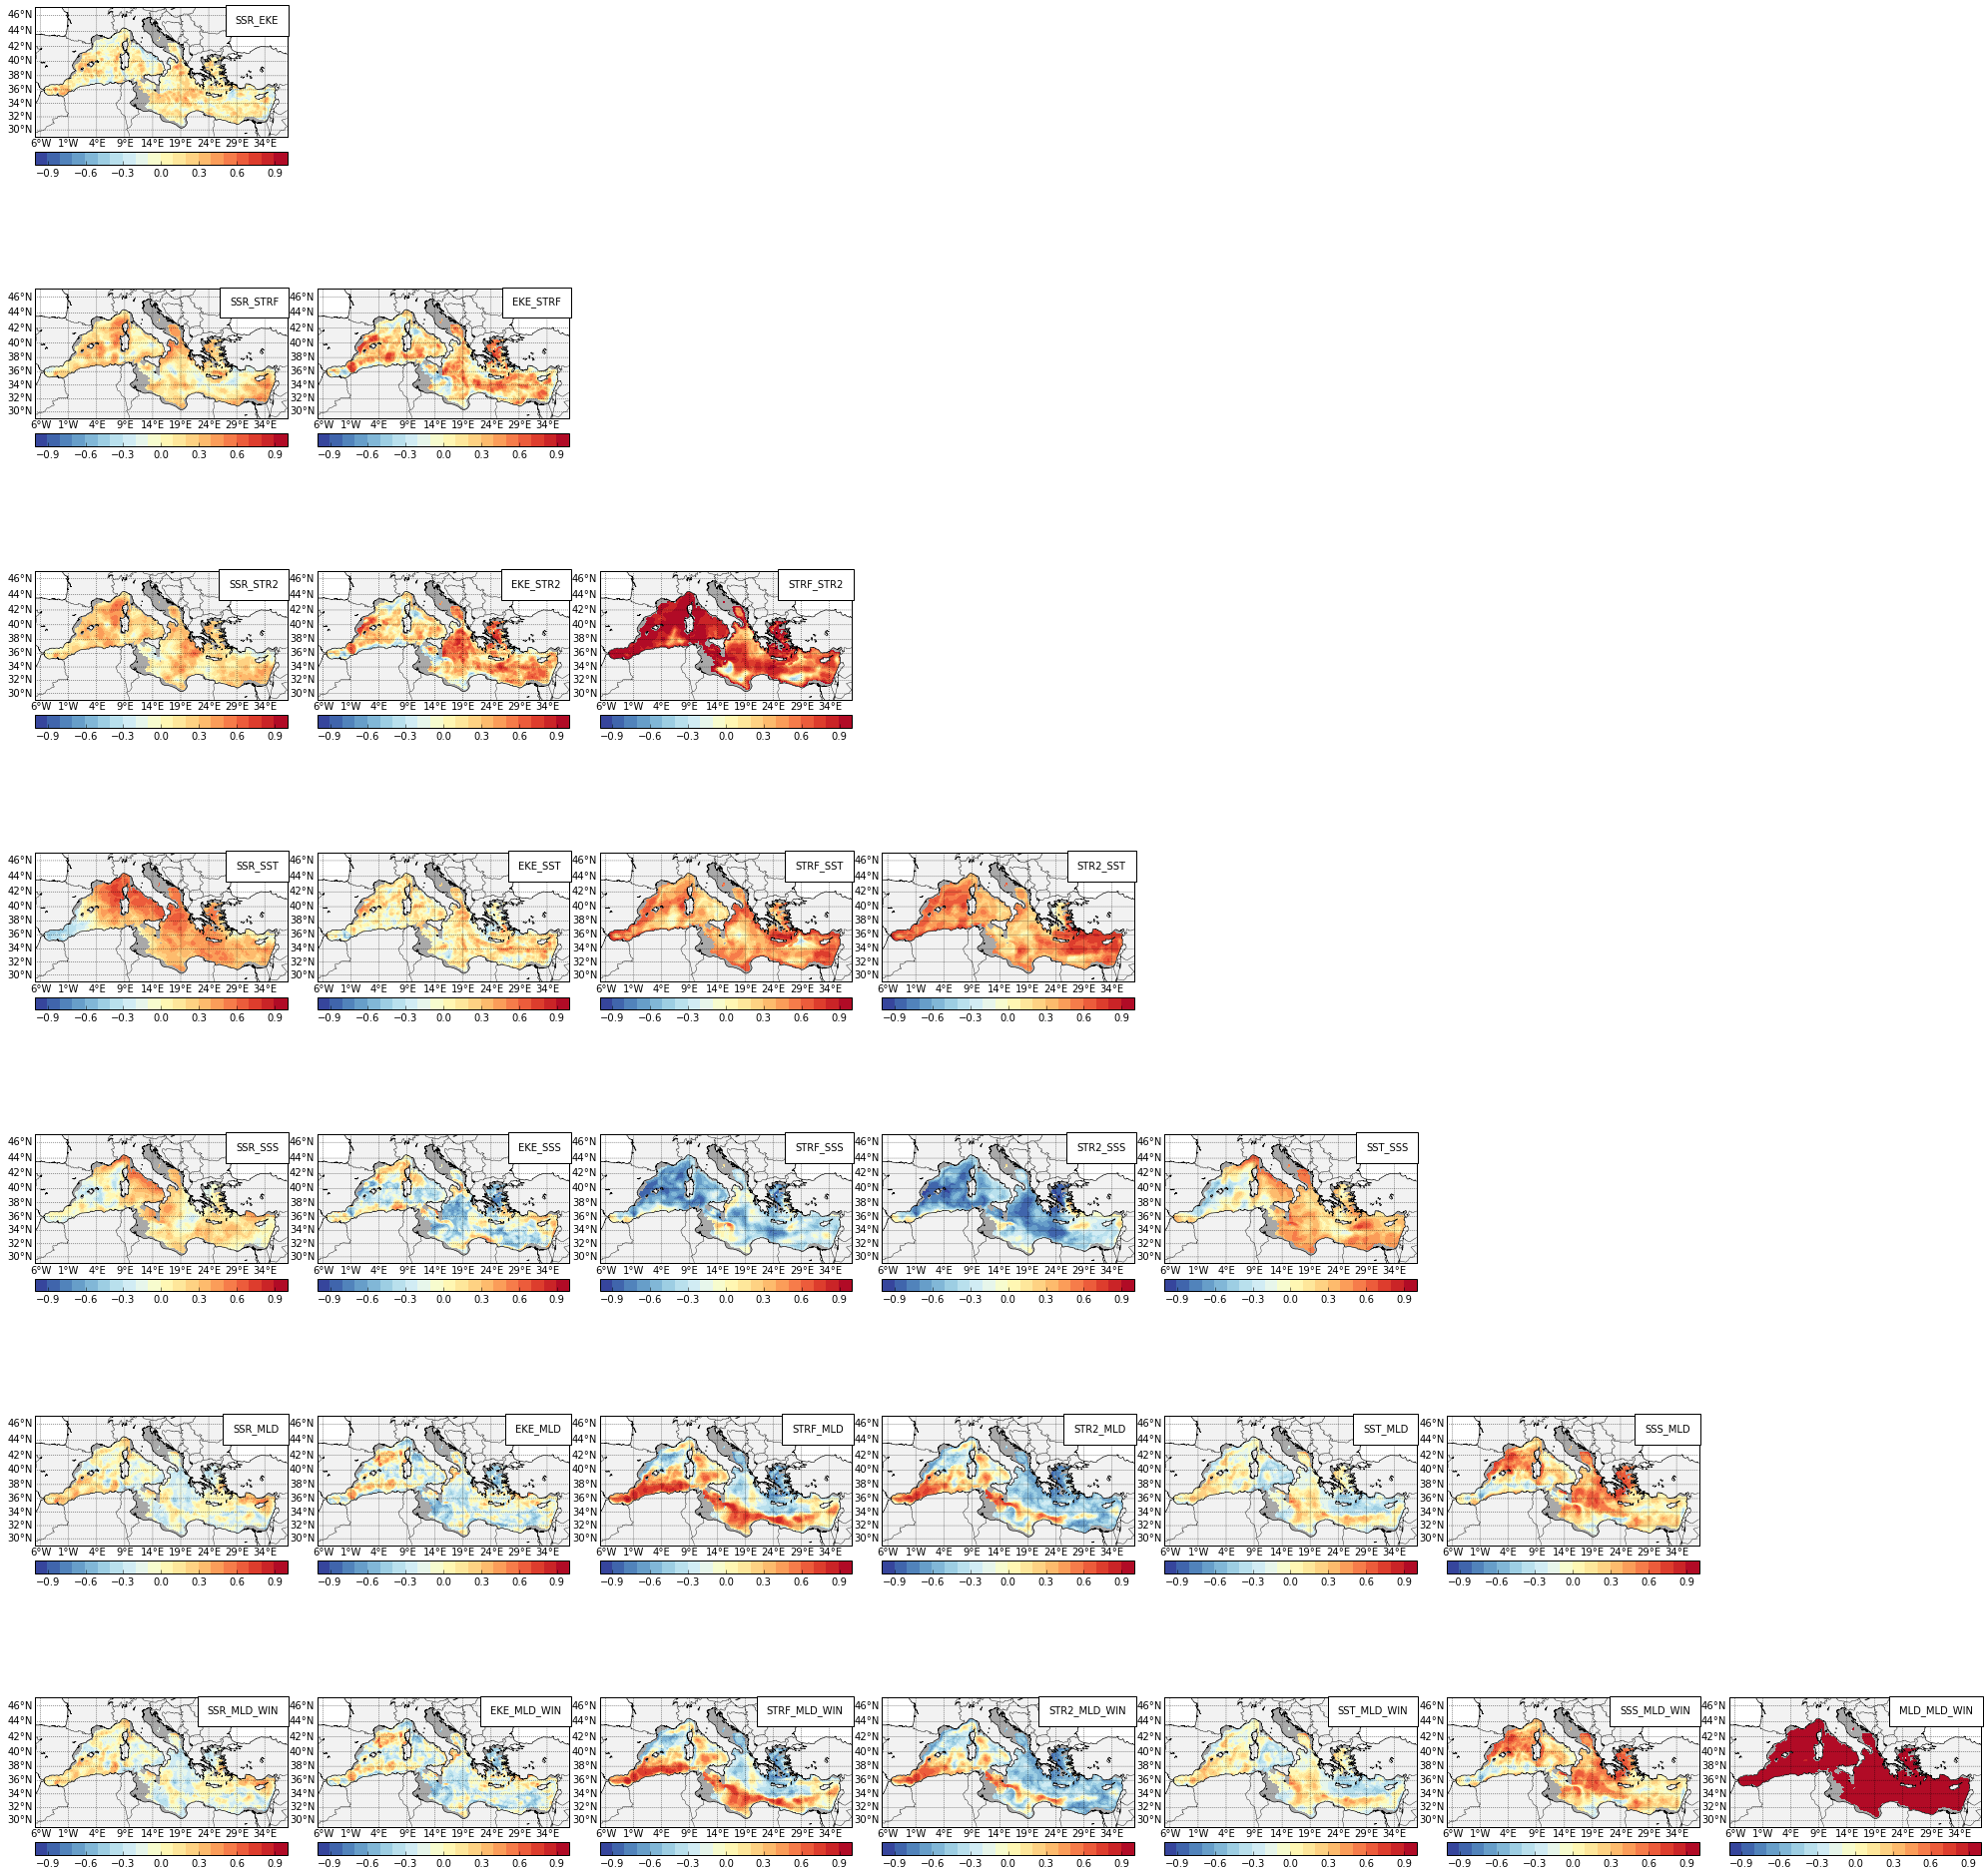

In [27]:
# TEST DISPOSITION FORCINGS #

var_phy1 = ['1', '2', '3', '4', '5', '6', '7'] 
var_phy2 = ['2', '3', '4', '5', '6', '7', '8']

var_phy_test = ['SSR', 'EKE', 'STRF', 'STR2', 'SST', 'SSS', 'MLD', 'MLD_WIN'] 

# figure
plt.figure(figsize=(40,40));

#c = 9 
for phyvar in var_phy1:
    c = 9*int(phyvar)
    for phyvar2 in var_phy2:
        if phyvar2>phyvar:
            
            i1 = int(phyvar)
            i2 = int(phyvar2)
            
            # subplot
            plt.subplot(8, 8, c)

            x1,x2,y1,y2 = -7, 38, 29, 47;
            m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
            ax = fig.add_axes([0.1,0.1,0.8,0.8]);
            m.drawcountries(linewidth=0.4);
            m.drawcoastlines(linewidth=0.6);
            m.fillcontinents(color='0.95',lake_color='white');
            parallels = np.arange(0.,81,2);
            m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
            #meridians = np.arange(-6.,351.,2); # 1.5
            meridians = np.arange(-6.,351.,5); # 1.5
            m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

            # Creating corresponding variable names
            data_to_plot = np.ma.masked_where(bathy<200,vars()['correl_'+phyvar+phyvar2])
            data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

            # doing a map # Données
            xd,yd = m(lon_t,lat_t);
            levels = np.arange(-1,1.1,0.1);
            #levels2 = [-0.3440,0.3440]; # More precise critical value for df=31 (N=33)
            levels_bathy = [200] ;
            m.contourf(xd,yd,test,cmap=plt.cm.Greys);
            CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
            cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
            #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
            #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
            
            plt.colorbar(cs, orientation='horizontal', pad = 0.06)
            
            x_text,y_text = m(36.5,46)
            if phyvar == '1':
                phyvar_1 = 'SSR'
            elif phyvar == '2':
                phyvar_1 = 'EKE'
            elif phyvar == '3':
                phyvar_1 = 'STRF'
            elif phyvar == '4':
                phyvar_1 = 'STR2'                
            elif phyvar == '5':
                phyvar_1 = 'SST'
            elif phyvar == '6':
                phyvar_1 = 'SSS'
            elif phyvar == '7':
                phyvar_1 = 'MLD'
            elif phyvar == '8':
                phyvar_1 = 'MLD_WIN'

            if phyvar2 == '2':
                phyvar_2 = 'EKE'
            elif phyvar2 == '3':
                phyvar_2 = 'STRF'
            elif phyvar2 == '4':
                phyvar_2 = 'STR2'                
            elif phyvar2 == '5':
                phyvar_2 = 'SST'
            elif phyvar2 == '6':
                phyvar_2 = 'SSS'
            elif phyvar2 == '7':
                phyvar_2 = 'MLD'
            elif phyvar2 == '8':
                phyvar_2 = 'MLD_WIN'

            this_txt = str(phyvar_1+'_'+phyvar_2)
            
            plt.text(x_text,y_text, this_txt,fontsize=10,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5,
            
            plt.subplots_adjust(hspace=0.1, wspace=0.12)
            c += 8

plt.savefig('/home/dosa/THESE/CR_reunions/JAN2019_FIGS/TEST5_fig.png',bbox_inches='tight',format='png')

print 'END of CELL'

7
13
19
25
31
14
20
26
32
21
27
33
28
34
35
END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in less


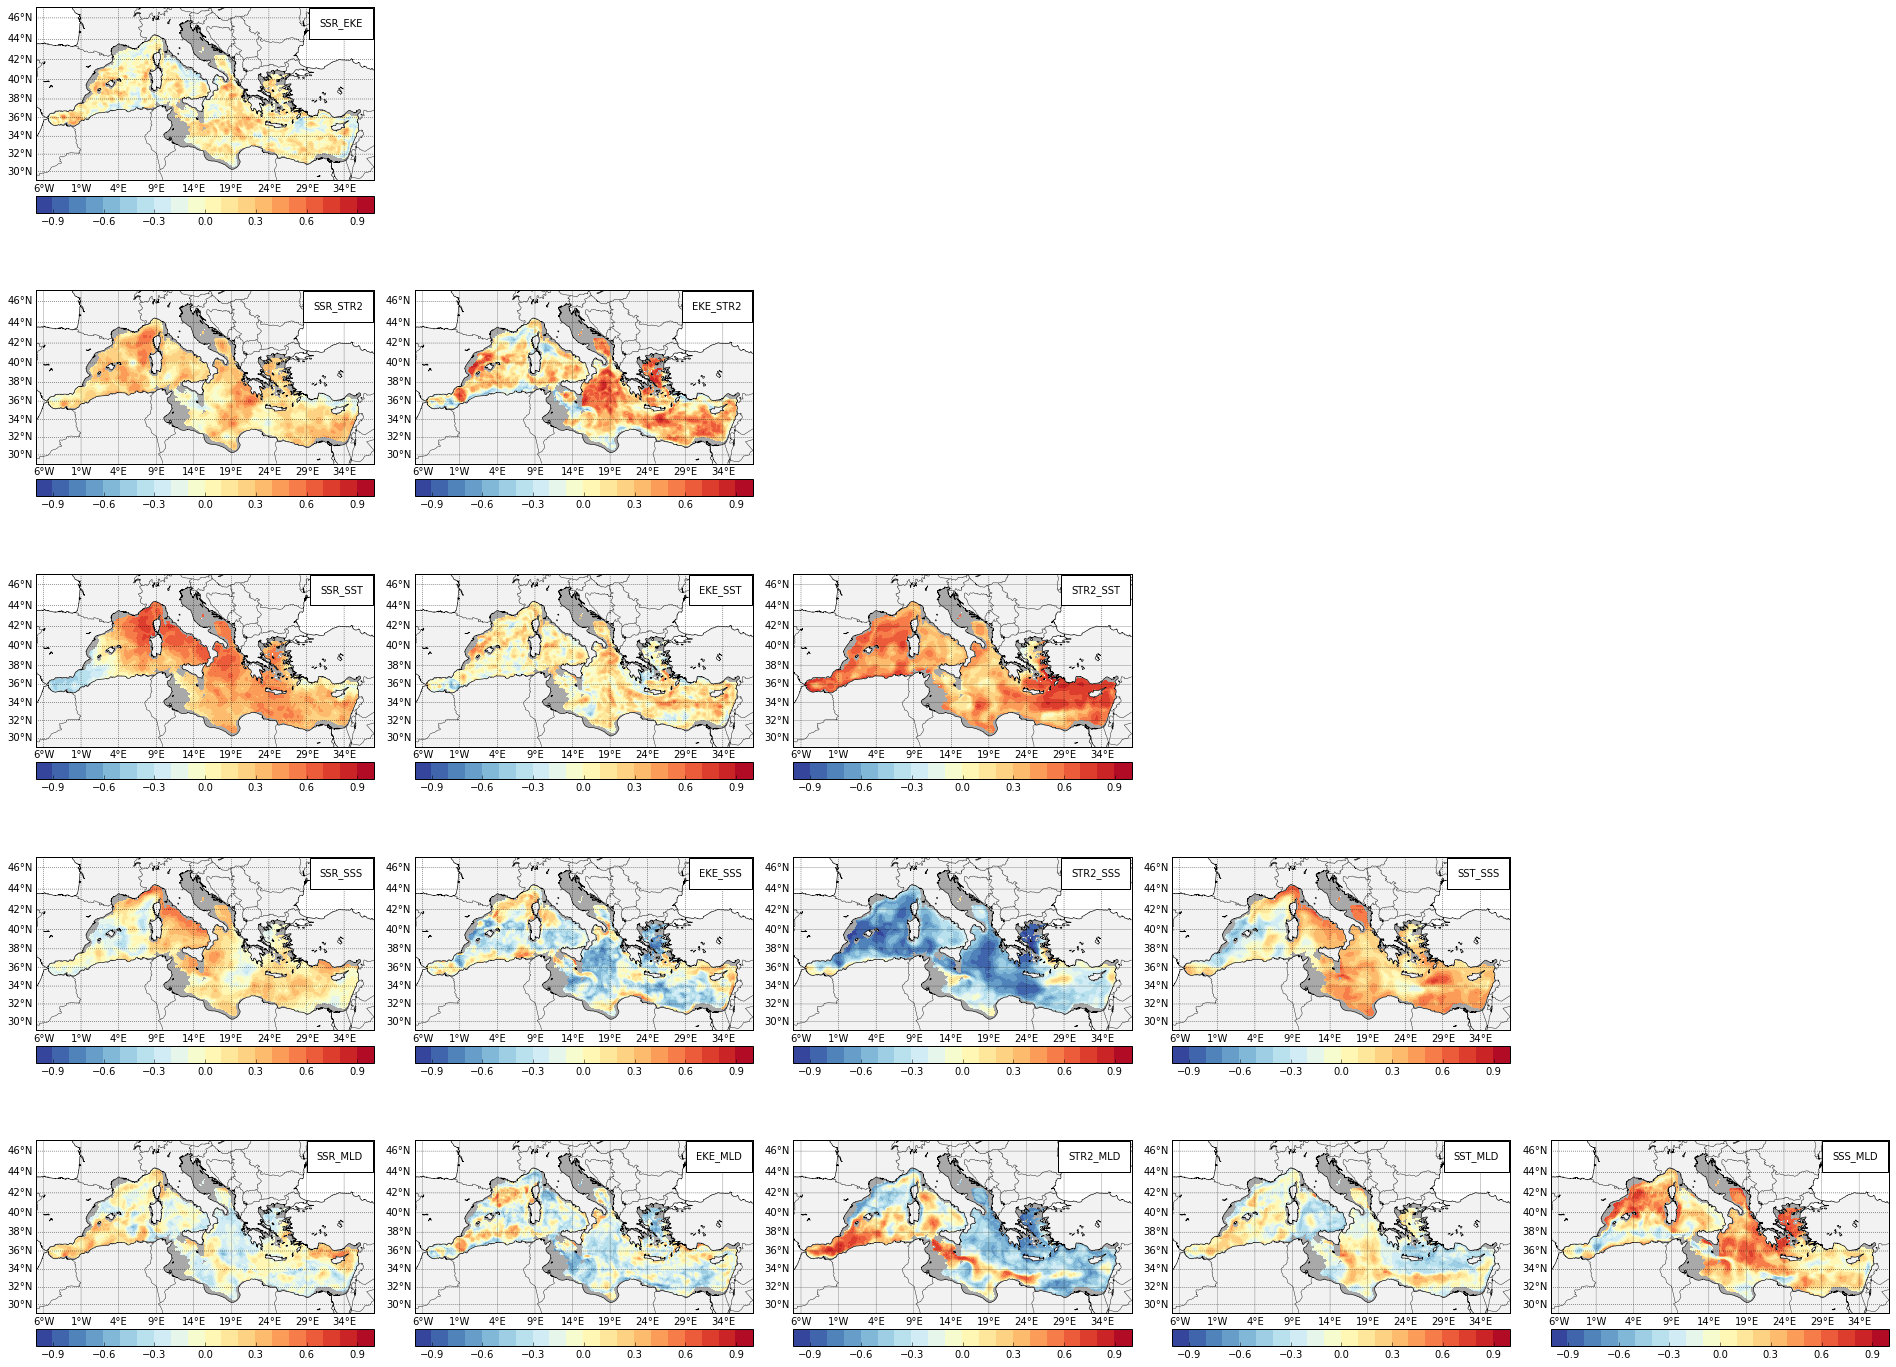

In [33]:
# TEST DISPOSITION FORCINGS #

var_phy1 = ['1', '2', '4', '5', '6', '7'] 
var_phy2 = ['2', '4', '5', '6', '7']

#var_phy_test = ['SSR', 'EKE', 'STRF', 'STR2', 'SST', 'SSS', 'MLD', 'MLD_WIN'] 

# figure
plt.figure(figsize=(40,30));

#c = 9 
varphy_i = 1
for phyvar in var_phy1:
    c = 7*int(varphy_i)
    for phyvar2 in var_phy2:
        if phyvar2>phyvar:
            print c
            i1 = int(phyvar)
            i2 = int(phyvar2)
            
            # subplot
            plt.subplot(6, 6, c)

            x1,x2,y1,y2 = -7, 38, 29, 47;
            m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
            ax = fig.add_axes([0.1,0.1,0.8,0.8]);
            m.drawcountries(linewidth=0.4);
            m.drawcoastlines(linewidth=0.6);
            m.fillcontinents(color='0.95',lake_color='white');
            parallels = np.arange(0.,81,2);
            m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
            #meridians = np.arange(-6.,351.,2); # 1.5
            meridians = np.arange(-6.,351.,5); # 1.5
            m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

            # Creating corresponding variable names
            data_to_plot = np.ma.masked_where(bathy<200,vars()['correl_'+phyvar+phyvar2])
            data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

            # doing a map # Données
            xd,yd = m(lon_t,lat_t);
            levels = np.arange(-1,1.1,0.1);
            #levels2 = [-0.3440,0.3440]; # More precise critical value for df=31 (N=33)
            levels_bathy = [200] ;
            m.contourf(xd,yd,test,cmap=plt.cm.Greys);
            CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
            cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
            #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
            #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
            
            plt.colorbar(cs, orientation='horizontal', pad = 0.06)
            
            x_text,y_text = m(36.5,46)
            if phyvar == '1':
                phyvar_1 = 'SSR'
            elif phyvar == '2':
                phyvar_1 = 'EKE'
            elif phyvar == '3':
                phyvar_1 = 'STRF'
            elif phyvar == '4':
                phyvar_1 = 'STR2'                
            elif phyvar == '5':
                phyvar_1 = 'SST'
            elif phyvar == '6':
                phyvar_1 = 'SSS'
            elif phyvar == '7':
                phyvar_1 = 'MLD'
            elif phyvar == '8':
                phyvar_1 = 'MLD_WIN'

            if phyvar2 == '2':
                phyvar_2 = 'EKE'
            elif phyvar2 == '3':
                phyvar_2 = 'STRF'
            elif phyvar2 == '4':
                phyvar_2 = 'STR2'                
            elif phyvar2 == '5':
                phyvar_2 = 'SST'
            elif phyvar2 == '6':
                phyvar_2 = 'SSS'
            elif phyvar2 == '7':
                phyvar_2 = 'MLD'
            elif phyvar2 == '8':
                phyvar_2 = 'MLD_WIN'

            this_txt = str(phyvar_1+'_'+phyvar_2)
            
            plt.text(x_text,y_text, this_txt,fontsize=10,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5,
            
            plt.subplots_adjust(hspace=0.1, wspace=0.12)
            c += 6
    varphy_i += 1

plt.savefig('/home/dosa/THESE/CR_reunions/JAN2019_FIGS/TEST_fig_v2.png',bbox_inches='tight',format='png')

print 'END of CELL'